# Final Data Science Project 2016 

## Notebook made by  

|** Name** | **Student id** | **email**|
|:- |:-|:-|
|Jan Jaap Meijerink |10560469|janjaap.meijerink@hotmail.com |
|Kevin Lok|10581367|kevinlok29@hotmail.com |
|Kelvin Chan |10634061|kelvinchan_913@hotmail.com|


> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='http://mjjmeijerink.github.io/DataScience/Selfies/1.jpg'/>


<br><br><br><br><br><br>
<center><h1>Invloeden op de Cito Score</h1></center><br>
<center><h4> Kelvin Chan, Kevin Lok, Jan Jaap Meijerink</h4></center><br>
<center><h6> 2016 </h6></center><br>

<br><br><br><br><br><br>


<center><h6> ABSTRACT </h6></center><br>

De cito score is eigenlijk maar een hele kleine tijdsopname omdat een cito toets maar drie dagen duurt, het bepaalt een heel groot deel van het leven van een persoon. Wij waren dus benieuwd of de cito score wel eerlijk is om als belangrijkste maatstaaf gebruikt te worden voor het bepalen van een schooladvies. Heeft iedereen wel een eerlijke kans  om zich te kunnen bewijzen op de middelbare school of zijn er factoren die dit zouden kunnen belemmeren. In dit onderzoek hebben wij onderzocht welke factoren van invloed zijn op de gemiddelde cito score, dit hebben wij per gemeente onderzocht en vanwege tijdsgebrek. Voor ons onderzoek hebben wij (x aantal) factoren gebruikt om te onderzoeken of ze van invloed waren op de cito score. 





<br><br><br>
<center><h1>Introductie</h1></center><br>
<center><font size="4">Hebben de wijkomstandigheden invloed op de gemiddelde Cito score van een school?</font></center><br>



- Heeft het werkloosheidscijfer per postcode invloed op de gemiddelde Cito score?


- Heeft het percentage allochtonen per postcode invloed de gemiddelde Cito score?

- Heeft de woonafstand tot een basisschool invloed op de gemiddelde Cito score?


Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Aenean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec quam felis, ultricies nec, pellentesque eu, pretium quis, sem. Nulla consequat massa quis enim. Donec pede justo, fringilla vel, aliquet nec, vulputate eget, arcu. In enim justo, rhoncus ut, imperdiet a, venenatis vitae, justo. Nullam dictum felis eu pede mollis pretium. Integer tincidunt. Cras dapibus. Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus. Phasellus viverra nulla ut metus varius laoreet. Quisque rutrum. Aenean imperdiet. Etiam ultricies nisi vel augue. Curabitur ullamcorper ultricies nisi. Nam eget dui. Etiam rhoncus. Maecenas tempus, tellus eget condimentum rhoncus, sem quam semper libero, sit amet adipiscing sem neque sed ipsum. Nam quam nunc, blandit vel, luctus pulvinar, hendrerit id, lorem. Maecenas nec odio et ante tincidunt tempus. Donec vitae sapien ut libero venenatis faucibus. Nullam quis ante. Etiam sit amet orci eget eros faucibus tincidunt. Duis leo. Sed fringilla mauris sit amet nibh. Donec sodales sagittis magna. Sed consequat, leo eget bibendum sodales, augue velit cursus nunc,

<center><h5> Gerelateerd werk </h5></center><br>


- Onderzoek naar invloed van gezinssamenstelling op de Cito score - CBS (2011)
- Relatie tussen leesgedrag en Cito score - D. Kortlever, J. Lemmens (2012)
- Genen en Cito score - E.L. de Zeeuw (2012)


<br><br>

<br><center><h5> Methodologie </h5></center><br>

<center><font size="3">Hoe is de data die wij hebben gebruikt verzameld?
</font></center><br>
<center><font size="3">Hoe willen wij onze hoofdvraag gaan beantwoorden?
</font></center>



In [82]:
%matplotlib inline
import numpy as np
import pandas as pd
import statistics as stats
import scipy.stats as scs

schooladviezen = pd.read_csv('Schooladviezen.csv')
citoscores = pd.read_csv('Eindscores.csv')
criminaliteit = pd.read_csv('criminaliteit.csv')
kerncijfers = pd.read_csv('kerncijfers.csv')
postcode_data = pd.read_csv('Postcodecijfers.csv')


dropColumns = ['PEILDATUM_LEERLINGEN', 'PRIKDATUM_SCORES', 'BRIN_NUMMER', 
               'SOORT_PO', 'BEVOEGD_GEZAG_NUMMER', 'ONTHEFFING_REDEN_ND',
               'IEP_AANTAL', 'IEP_GEM', 'ROUTE8_AANTAL', 'ROUTE8_GEM', 
               'PRIKDATUM_ADVIEZEN', 'ADVIES_NIET_MOGELIJK', 'DREMPEL_AANTAL', 'DREMPEL_GEM']

allData = citoscores[citoscores.CET_GEM > 0].merge(schooladviezen, how='inner').drop(dropColumns, 1)

In [83]:
allData.head()

,VESTIGINGSNUMMER,INSTELLINGSNAAM_VESTIGING,POSTCODE_VESTIGING,PLAATSNAAM,GEMEENTENUMMER,GEMEENTENAAM,PROVINCIE,DENOMINATIE_VESTIGING,LEERJAAR_8,CET_AANTAL,...,VMBO_BL_KL,VMBO_KL,VMBO_KL_GT,VMBO_GT,VMBO_GT_HAVO,HAVO,HAVO_VWO,VWO,TOTAAL_ADVIES,ADVIES_HERZIEN
0,0,De Schanskorf,2715BT,ZOETERMEER,637,Zoetermeer,Zuid-Holland,Gereformeerd vrijgemaakt,11,11,...,0,1,1,2,0,5,1,1,11,0
1,0,"BS ""De Maasparel""",6109AM,OHE EN LAAK,1641,Maasgouw,Limburg,Rooms-Katholiek,18,18,...,0,0,0,4,0,7,0,6,18,0
2,0,De Kiezel en de Kei,2971AR,BLESKENSGRAAF CA,1927,Molenwaard,Zuid-Holland,Openbaar,24,22,...,3,0,0,4,5,3,2,4,22,0
3,0,OBS De Klimboom,6666EB,HETEREN,1734,Overbetuwe,Gelderland,Openbaar,12,11,...,0,2,0,3,0,1,4,0,12,1
4,0,Obs Letterwies,9944AR,NIEUWOLDA,1895,Oldambt,Groningen,Openbaar,16,16,...,0,3,0,2,0,5,0,2,16,0


In [84]:
criminaliteit.head()

,Regio's,2013 - 1,2013 - 2,2013 - 3,2014 - 1,2014 - 2,2014 - 3
0,Aa en Hunze,770,180,270,670,145,180
1,Aalburg,430,80,115,410,95,115
2,Aalsmeer,1245,255,335,1190,320,395
3,Aalten,675,150,180,675,160,175
4,Achtkarspelen,710,230,260,750,250,300


In [85]:
kerncijfers.head()

,Regio's,Perioden,aantal inwoners,% allochtonen,% huishoudens met kinderen,WW-uitkeringen,afstand tot school in km
0,Aa en Hunze,2014,25357,5.8,33.7,41,1.1
1,Aalburg,2014,12846,4.8,45.4,31,0.7
2,Aalsmeer,2014,30759,16.7,42.2,34,0.7
3,Aalten,2014,27013,11.0,37.1,42,0.8
4,Achtkarspelen,2014,28016,3.6,39.8,58,0.7


In [86]:
postcode_data.head()

,Postcodes op 1 januari,aantal inwoners,allochtonen,Westerse allochtonen,Niet-westerse allochtonen,aantal huishoudens,aantal eenpersoonshuishoudens,aantal meerpersoonshuishoudens zonder kinderen,aantal meerpersoonshuishoudens met kinderen,gemiddelde huishoudensgrootte,gemeentecode,Gemeentenaam
0,1011; Amsterdam,9320,3520,2325,1195,6210,4120,1250,845,1.50,363,Amsterdam
1,1012; Amsterdam,8090,3525,2275,1250,5845,4290,1125,425,1.35,363,Amsterdam
2,1013; Amsterdam,21570,9390,4290,5095,13220,8265,2500,2460,1.61,363,Amsterdam
3,1014; Amsterdam,250,145,80,60,160,120,25,10,1.35,363,Amsterdam
4,1015; Amsterdam,14670,5140,3530,1610,9860,6615,1900,1350,1.49,363,Amsterdam


In [87]:
provincies = allData.groupby(['PROVINCIE']).mean()['CET_GEM'].sort_values(ascending=False)
provincies

PROVINCIE
Limburg          536.173977
Utrecht          535.547113
Noord-Brabant    535.154485
Zeeland          535.079755
Friesland        534.982270
Gelderland       534.830869
Overijssel       534.791216
Groningen        534.702778
Drenthe          534.603209
Zuid-Holland     534.510120
Noord-Holland    534.262500
Flevoland        533.773885
Name: CET_GEM, dtype: float64

In [88]:
denominaties = allData.groupby(['DENOMINATIE_VESTIGING']).mean()['CET_GEM'].sort_values(ascending=False)
denominaties

DENOMINATIE_VESTIGING
Algemeen bijzonder          536.665471
Reformatorisch              536.135256
Gereformeerd vrijgemaakt    535.894175
Rooms-Katholiek             535.392995
Hindoeistisch               535.066667
Protestants-Christelijk     535.017190
Antroposofisch              534.643750
Joods                       534.050000
Openbaar                    533.966610
Samenwerking Opb., PC       533.600000
Samenwerking PC, RK         533.432653
Islamitisch                 532.352632
Samenwerking Opb., RK       532.200000
Evangelisch                 532.200000
Interconfessioneel          530.428571
Name: CET_GEM, dtype: float64

In [89]:
gemeentenamen = allData.groupby(['GEMEENTENAAM']).mean()['CET_GEM'].sort_values(ascending=False)
gemeentenamen

GEMEENTENAAM
Rozendaal                        541.900000
Wassenaar                        540.055556
Bussum                           539.950000
Oegstgeest                       539.950000
Laren                            539.600000
Gulpen-Wittem                    539.557143
Nuth                             539.100000
Voerendaal                       538.950000
Bloemendaal                      538.850000
Eijsden-Margraten                538.509091
Heemstede                        538.414286
Weesp                            538.360000
Mill en Sint Hubert              538.133333
Blaricum                         538.125000
Ouder-Amstel                     538.080000
Veldhoven                        538.050000
Nuenen, Gerwen en Nederwetten    538.042857
Noordwijk                        537.930000
Halderberge                      537.800000
Staphorst                        537.800000
Huizen                           537.772727
Bergen (L.)                      537.728571
Amstelveen         

<br><center><h5> Evaluatie </h5></center><br>

In [90]:
def normalize_advies(x):
    return (x['ADVIES_HERZIEN']/x['LEERJAAR_8']) * 100

group_by_gemeente = allData.groupby(['GEMEENTENAAM']).sum().apply(lambda x: normalize_advies(x),\
                                                                  1).sort_values(ascending=False)
gemeente_herzien = pd.concat([gemeentenamen, group_by_gemeente], axis=1)
gemeente_herzien.columns = ['CET_GEM', 'ADVIES_HERZIEN']

In [91]:
def merge(x):
    return x[1:].sum()

criminaliteit['total'] = criminaliteit.apply(lambda x: merge(x), 1)
data = pd.concat([criminaliteit["Regio's"], criminaliteit['total'], kerncijfers['aantal inwoners']\
                  , kerncijfers['% allochtonen'], kerncijfers['WW-uitkeringen'],\
                 kerncijfers['afstand tot school in km'], kerncijfers['% huishoudens met kinderen']], 1).set_index("Regio's")
data['CET_GEM'] = gemeentenamen
data['normalized crime'] = data.apply(lambda x: x['total'] / x['aantal inwoners'], 1)

#### WW-uitkeringen en Cito scores

In [92]:
data.dropna()[['CET_GEM', 'WW-uitkeringen']].corr()

,CET_GEM,WW-uitkeringen
CET_GEM,1.000000,-0.122227
WW-uitkeringen,-0.122227,1.000000


#### Percentage allochtonen en Cito scores

In [93]:
data.dropna()[['CET_GEM', '% allochtonen']].corr()

,CET_GEM,% allochtonen
CET_GEM,1.000000,-0.027101
% allochtonen,-0.027101,1.000000


In [94]:
allData['4cijfer'] = allData.apply(lambda x: x['POSTCODE_VESTIGING'][:4], 1)
postcodes = allData.groupby('4cijfer').mean()['CET_GEM']

postcode_data['Postcodes op 1 januari'] = postcode_data['Postcodes op 1 januari'].str[:4]
postcode_data.set_index('Postcodes op 1 januari', inplace=True)
postcode_data = pd.concat([postcode_data, postcodes], 1).dropna()

for column in postcode_data.columns[1:-4]:
    postcode_data[column + ' normalized'] = postcode_data.apply(lambda x: x[column] / float(x['aantal inwoners']), 1)

#### Niet-westerse allochtonen en Cito score

In [95]:

postcode_data[['Niet-westerse allochtonen normalized', 'CET_GEM']].corr()

,Niet-westerse allochtonen normalized,CET_GEM
Niet-westerse allochtonen normalized,1.000000,-0.317566
CET_GEM,-0.317566,1.000000


#### R Westerse allochtonen en Cito score

In [96]:
postcode_data[['Westerse allochtonen normalized', 'CET_GEM']].corr()

,Westerse allochtonen normalized,CET_GEM
Westerse allochtonen normalized,1.000000,0.012864
CET_GEM,0.012864,1.000000


#### R afstand tot school in km en Cito score

In [97]:
data.dropna()[['afstand tot school in km', 'CET_GEM']].corr()

,afstand tot school in km,CET_GEM
afstand tot school in km,1.00000,-0.03712
CET_GEM,-0.03712,1.00000


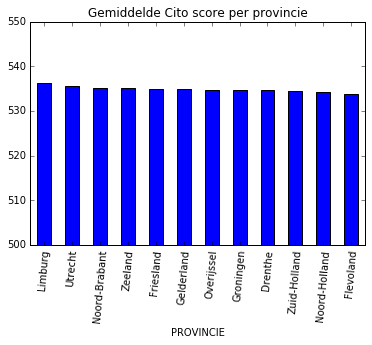

In [98]:
provincies.plot(kind='bar', ylim=[500,550], rot=85, title='Gemiddelde Cito score per provincie')


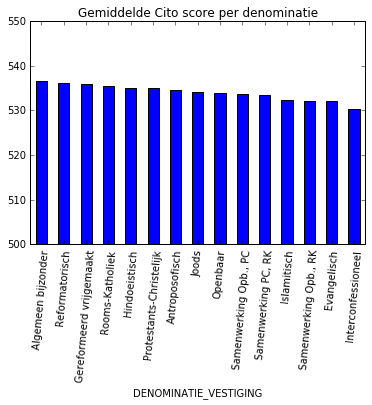

In [99]:
denominaties.plot(kind='bar', ylim = [500, 550], rot = 85, title='Gemiddelde Cito score per denominatie')

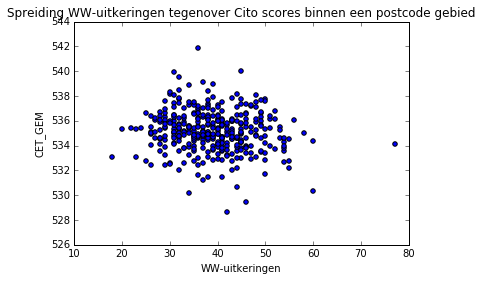

In [100]:
data.plot(kind='scatter', y='CET_GEM', x='WW-uitkeringen', title='Spreiding WW-uitkeringen tegenover Cito scores binnen een postcode gebied')

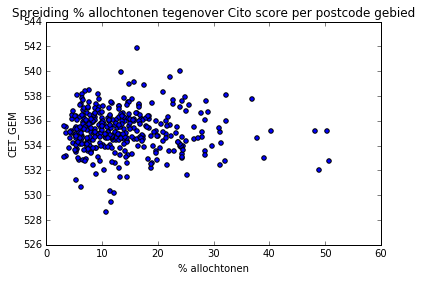

In [101]:
data.plot(kind='scatter', y='CET_GEM', x='% allochtonen', title='Spreiding % allochtonen tegenover Cito score per postcode gebied')

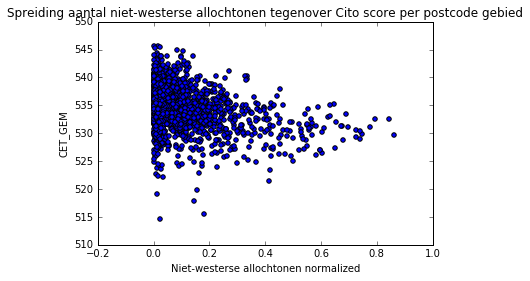

In [102]:
postcode_data.plot(kind='scatter', x='Niet-westerse allochtonen normalized', y='CET_GEM', title='Spreiding aantal niet-westerse allochtonen tegenover Cito score per postcode gebied')

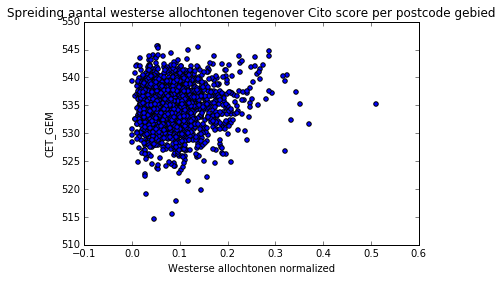

In [103]:
postcode_data.plot(kind='scatter', x='Westerse allochtonen normalized', y='CET_GEM', title='Spreiding aantal westerse allochtonen tegenover Cito score per postcode gebied')

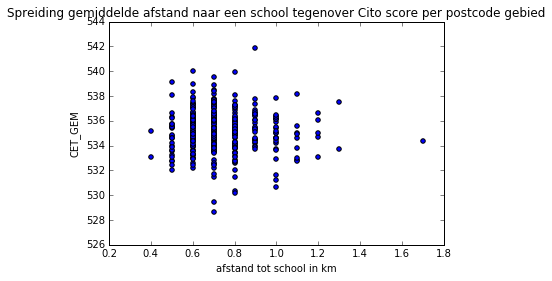

In [104]:
data.plot(kind='scatter', x='afstand tot school in km', y='CET_GEM', title='Spreiding gemiddelde afstand naar een school tegenover Cito score per postcode gebied')

<br><center><h5> Conclusie </h5></center><br>

- Percentage allochtonen binnen een postcode gebied heeft geen invloed op de Cito scores binnen dat gebied
    - Maar: Het percentage niet-westerse allochtonen binnen een postcode gebied heeft een zwakke correlatie met de Cito scores binnen dat gebied

- Het aantal WW-uitkeringen binnen een postcode gebied heeft geen invloed op de Cito scores binnen dat gebied

- Woonafstand heeft geen invloed op de Cito scores




Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Aenean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec quam felis, ultricies nec, pellentesque eu, pretium quis, sem. Nulla consequat massa quis enim. Donec pede justo, fringilla vel, aliquet nec, vulputate eget, arcu. In enim justo, rhoncus ut, imperdiet a, venenatis vitae, justo. Nullam dictum felis eu pede mollis pretium. Integer tincidunt. Cras dapibus. Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus. Phasellus viverra nulla ut metus varius laoreet. Quisque rutrum. Aenean imperdiet. Etiam ultricies nisi vel augue. Curabitur ullamcorper ultricies nisi. Nam eget dui. Etiam rhoncus. Maecenas tempus, tellus eget condimentum rhoncus, sem quam semper libero, sit amet adipiscing sem neque sed ipsum. Nam quam nunc, blandit vel, luctus pulvinar, hendrerit id, lorem. Maecenas nec odio et ante tincidunt tempus. Donec vitae sapien ut libero venenatis faucibus. Nullam quis ante. Etiam sit amet orci eget eros faucibus tincidunt. Duis leo. Sed fringilla mauris sit amet nibh. Donec sodales sagittis magna. Sed consequat, leo eget bibendum sodales, augue velit cursus nunc,

<br><center><h5> Einde </h5></center><br>